# "The Darvish Effect: Perceived Rarity in the New MLB"

- toc: false
- badges: true
- comments: false
- categories: [sports, data science]
- image: 

## Motivation
On September 17, 2019, Yu Darvish recorded eight consecutive strikeouts for the Chicago Cubs. It was clear that this was regarded by the broadcast crew as tremendously rare, and much historical context was given &mdash; including reference to the MLB record of ten consecutive strikeouts by Tom Seaver in 1970. Given that one of the most significant changes in baseball over the past several decades is the increase in strikeout rate, I was curious to find out how much more likely such an occurrence is today versus, say, 50 years ago. In the end, I find that occurence of K streaks is indeed growing exponentially, and Seaver's feat was roughly **1,164 times less likely** than Darvish's.

## Getting started
In order to find the expected rate of incidence, we first need to establish:

1. How many **opportunities** are there? I.e. for potential streak length X, a given pitcher in each game has \[total batters faced - X] opportunities to begin such a streak

2. How likely is this streak to materialize? If our pitcher on average strikes out 25% of all batters he faces, the odds of striking out any string of eight batters in consecutive fashion is 0.25^8, or about 1 in 66,000.

To that end, it was easy enough to get [FanGraphs](https://www.fangraphs.com/leaders.aspx?pos=all&stats=sta&lg=all&qual=0&type=0&season=2020&month=0&season1=1900&ind=0&team=0,ss&rost=0&age=0&filter=&players=0&startdate=1900-01-01&enddate=2020-12-31) to spit out a table of all the usual pitching stats, SP only, MLB-wide, by year since 1900.

This does not include Batters Faced, but we can back that out using BF = 3*IP + H + BB + HBP. From there, we just need to back out the 'K rate' using K / BF.

In [27]:
#collapse-hide
import pandas as pd
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

raw_stats = 'C:/Users/tmaul/Documents/GitHub/website/assets/raw_data/fan_graphs_sp_data.csv'
cols_to_use = ['Season', 'GS', 'IP', 'H', 'BB', 'HBP', 'SO']
# drop 2020 due to shortened season
sp_data_fg = pd.read_csv(raw_stats, usecols=cols_to_use, index_col='Season').rename(columns={'SO' : 'K'}).drop(2020)
sp_data_fg['BF_est'] = sp_data_fg.IP*3 + sp_data_fg.H + sp_data_fg.BB + sp_data_fg.HBP
sp_data_fg['BF_per_start_est'] = sp_data_fg.BF_est/sp_data_fg.GS
sp_data_fg['K_rt_SP'] = sp_data_fg.K/sp_data_fg.BF_est
sp_data_fg
# this is a limited approximation bc of RPs

,GS,H,BB,IP,HBP,K,BF_est,BF_per_start_est,K_rt_SP
Season,,,,,,,,,
1900,1131,10711,2942,9743.00,516,2643,43398.00,38.37,0.06
1901,2217,20819,5420,19457.10,874,6954,85484.30,38.56,0.08
1902,2225,20144,5367,19559.20,761,6595,84949.60,38.18,0.08
1903,2226,19640,5390,19532.20,750,7923,84376.60,37.91,0.09
1904,2492,20174,5676,21830.00,800,9250,92140.00,36.97,0.10
...,...,...,...,...,...,...,...,...,...
2015,4858,28040,8518,28223.10,1040,23218,122267.30,25.17,0.19
2016,4856,27452,9004,27412.20,993,23619,119685.60,24.65,0.20
2017,4860,26919,9330,26787.10,1040,23691,117650.30,24.21,0.20


## A pastime unlike the past
Now that we have all of the necessary numbers in place, let's take a look at some basic trends. As expected, the 'K rate' has increased dramatically in the last 100 years. However, we can also see that the average starting pitcher in 1900 faced almost twice as many batters as today, and this diminished opportunity will counteract the surge in punch-outs to some extent.

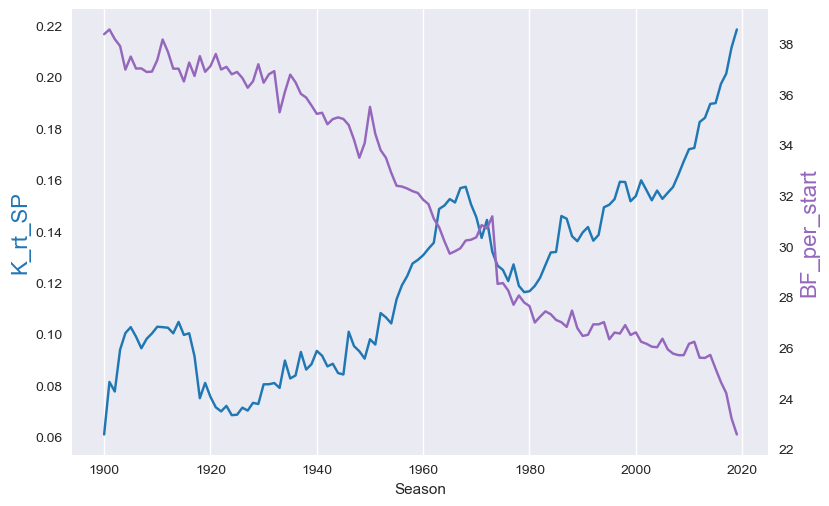

In [82]:
#collapse-hide
import matplotlib as plt
# plt.rcdefaults()
plt.style.use('seaborn')
ax = sp_data_fg.plot(y='K_rt_SP', legend=None, color='tab:blue');
ax.set_ylabel('K_rt_SP', fontsize=16, color='tab:blue');
ax2 = ax.twinx();
sp_data_fg.plot(y='BF_per_start_est', ax=ax2, legend=None, color='tab:purple');
ax2.set_ylabel('BF_per_start', fontsize=16, color='tab:purple');
ax.grid(b=False, axis='y'); ax2.grid(b=False, axis='y');

## Results
All that's left to do now is calculate the theoretical rate of incidence (shown below for X = 5, 8). A few interesting results:

* With the rise of the strikeout, the expected number of K streaks is growing exponentially, in particular since 2000.

* We can see that the Darvish Effect is inevitable: something that has only happened a handful of times in MLB history **sounds like** a generational anomaly, and yet we can show that in today's game it will be orders of magnitude more common.

* In numerical terms: 50 years ago, we would expect a pitcher to record eight consecutive strikeouts just once in 57 MLB seasons. As of 2019, we can now expect once in 2.5 seasons.

* Drawing a direct comparison between Seaver's MLB record and Darvish's eight, we see that the former is almost 1200x less likely in expectation.

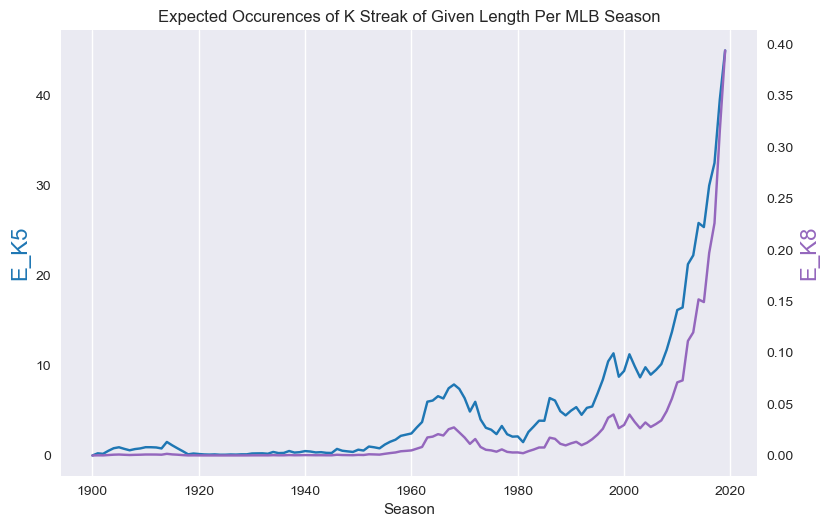

In [78]:
#collapse-hide
sp_data_fg['E_K5'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-4)*sp_data_fg.K_rt_SP**5
sp_data_fg['E_K8'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-7)*sp_data_fg.K_rt_SP**8
sp_data_fg['E_K10'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-9)*sp_data_fg.K_rt_SP**10

ax = sp_data_fg.plot(y='E_K5', legend=None, color='tab:blue');
ax.set_ylabel('E_K5', color='tab:blue', fontsize=16);
ax2 = ax.twinx();
sp_data_fg.plot(y='E_K8', ax=ax2, color='tab:purple', legend=None);
ax2.set_ylabel('E_K8', color='tab:purple', fontsize=16);
ax.grid(b=False, axis='y'); ax2.grid(b=False, axis='y');
ax.set_title('Expected Occurences of K Streak of Given Length Per MLB Season');

In [81]:
#collapse-hide
seaver = sp_data_fg.E_K10[1970]
darvish = sp_data_fg.E_K8[2019]
K8_1970 = sp_data_fg.E_K8[1970]
print(f'1970: Expected one K8 streak every {round(1/K8_1970, 1)} seasons.')
print(f'2019: Expected one K8 streak every {round(1/darvish, 1)} seasons.')
print(f'Seaver\'s K10: about {int(darvish/seaver)} times less likely than Darvish\'s K8')

1970: Expected one K8 streak every 57.2 seasons.
2019: Expected one K8 streak every 2.5 seasons.
Seaver's K10: about 1164 times less likely than Darvish's K8


## Limitations and areas of further exploration
1. As mentioned earlier, our source data only covers Starting Pitchers. This is fairly reasonable, as our chief concern was starters to begin with and, especially for streaks on the longer end, relievers are likely not much of a factor anyway.

2. This analysis only uses MLB-wide 'K rate' as an input &mdash; this is a major simplification. In reality, there will be above and below-average pitchers, and since the 'K rate' is compounded, this should result in **more** observed streaks than our estimates. Furthermore, pitchers who are better than average and/or already having a great outing are more likely to remain in the game, and face more batters.

3. Using game logs from RetroSheet (or other data?), it should be theoretically possible to produce the exact number of observed K streaks per season.

4. We could attempt a less stylized, more rigorous analysis by building some approximate underlying distributions for 'K rate' among pitcher population and expected number and length of outings for each respective pitcher, then simulating outcomes.